<a href="https://colab.research.google.com/github/aytenpulcu/DataMining_giriftProje/blob/main/second.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PAKETLER
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, max_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from datetime import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, TimeDistributed, Bidirectional, ConvLSTM2D, Dropout
from tensorflow.keras.models import model_from_json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##read excel file by date
df=pd.read_excel('/content/drive/MyDrive/dataSet_2.xlsx')


#first data views
df.head()

,"Yerel zaman , saat",T,Po,Pa,U,DD,N,WW,W1,W2,Cl,Nh,H,Cm,Ch,VV,Td,date,time,energy
0,"30.04.2023, 12:00",9.476923,671.646154,0.076923,44.000000,Rüzgar kuzeyden esiyor,20,,NaN,NaN,Yassı ve/veya parçalı kümülüs bulutlar; kötü h...,20.0,1500.0,"Altokümülüs, altostratüs ve nimbostratüs bulut...","Sirrüs, sirrokümülüs veya sirrostratüs bulutla...",20.0,-3.0,2023-04-30,12:00,0.000
1,"29.04.2023, 12:00",4.807692,671.507692,-0.038462,65.923077,Rüzgar kuzeybatıdan esiyor,90,,NaN,NaN,Kümülüs bulutlardan meydana gelmeyen stratoküm...,50.0,1500.0,İçinden ışığın geçmesine izin veren altokümülü...,"Sirrüs, sirrokümülüs veya sirrostratüs bulutla...",20.0,-0.7,2023-04-29,12:00,8399.968
2,"28.04.2023, 12:00",5.461538,671.838462,0.246154,69.769231,Rüzgar kuzey-kuzeybatı yönünden esiyor,100,,NaN,NaN,Kümülüs bulutlardan meydana gelen stratokümülü...,60.0,1000.0,İçinden ışığın geçmesine izin vermeyen altostr...,NaN,20.0,0.4,2023-04-28,12:00,2644.160
3,"27.04.2023, 12:00",8.861538,667.530769,0.200000,77.307692,Rüzgar doğu-güneydoğu yönünden esiyor,90,Yağmur sağanağı. Hafif. Son 1 saatte veya gözl...,Sağanak.,Sağanak.,Orta veya güçlü kümülüs bulutlar; parçalanmış ...,50.0,1000.0,İçinden ışığın geçmesine izin veren altokümülü...,"Sirrüs, sirrokümülüs veya sirrostratüs bulutla...",10.0,6.2,2023-04-27,12:00,3213.984
4,"26.04.2023, 12:00",14.076923,668.784615,-0.469231,45.538462,Rüzgar güney-güneybatı yönünden esiyor,70,,NaN,NaN,Orta veya güçlü kümülüs bulutlar; parçalanmış ...,70.0,1500.0,"Altokümülüs, altostratüs ve nimbostratüs bulut...","Sirrüs, sirrokümülüs veya sirrostratüs bulutla...",20.0,1.6,2023-04-26,12:00,3397.888


In [ ]:
df.shape

(395, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Yerel zaman , saat  395 non-null    object        
 1   T                   395 non-null    float64       
 2   Po                  395 non-null    float64       
 3   Pa                  395 non-null    float64       
 4   U                   395 non-null    float64       
 5   DD                  395 non-null    object        
 6   N                   395 non-null    int64         
 7   WW                  395 non-null    object        
 8   W1                  63 non-null     object        
 9   W2                  63 non-null     object        
 10  Cl                  286 non-null    object        
 11  Nh                  286 non-null    float64       
 12  H                   286 non-null    float64       
 13  Cm                  283 non-null    object        

In [ ]:
df.describe()

,T,Po,Pa,U,N,Nh,H,VV,Td,energy
count,395.000000,395.000000,395.000000,395.000000,395.000000,286.000000,286.000000,395.000000,395.000000,395.000000
mean,13.549921,673.408413,-0.211063,57.310964,40.683544,34.650350,1670.979021,18.525063,4.314177,4693.053124
std,7.906621,3.452199,0.350268,15.490105,34.652570,23.464421,470.643926,4.218987,5.851010,2056.589985
min,-5.200000,664.300000,-1.346154,17.769231,0.000000,0.000000,600.000000,0.200000,-10.700000,0.000000
25%,7.976923,671.076923,-0.423077,46.923077,0.000000,20.000000,1500.000000,20.000000,0.300000,3300.508000
50%,13.023077,672.946154,-0.230769,56.000000,40.000000,40.000000,1500.000000,20.000000,3.700000,5168.000000
75%,20.592308,675.603846,-0.020192,67.346154,70.000000,50.000000,1500.000000,20.000000,9.650000,6381.488000
max,27.500000,683.238462,1.507692,99.230769,100.000000,100.000000,2500.000000,20.000000,16.000000,8399.968000


In [ ]:
df.isna().sum()

Yerel zaman , saat      0
T                       0
Po                      0
Pa                      0
U                       0
DD                      0
N                       0
WW                      0
W1                    332
W2                    332
Cl                    109
Nh                    109
H                     109
Cm                    112
Ch                    120
VV                      0
Td                      0
date                    0
time                    0
energy                  0
dtype: int64

In [ ]:
# df.dropna(subset=['W1'], inplace=True)
# df.dropna(subset=['W2'], inplace=True)
# df.dropna(subset=['Cl'], inplace=True)
df['Nh'].fillna(df['Nh'].median(), inplace=True)
df['H'].fillna(df['H'].median(), inplace=True)
# df.dropna(subset=['Cm'], inplace=True)
# df.dropna(subset=['Ch'], inplace=True)
df=df.drop('W1',axis=1)
df=df.drop('W2',axis=1)
df=df.drop('Cl',axis=1)
df=df.drop('Cm',axis=1)
df=df.drop('Ch',axis=1)

In [ ]:
df.isna().sum()

Yerel zaman , saat    0
T                     0
Po                    0
Pa                    0
U                     0
DD                    0
N                     0
WW                    0
Nh                    0
H                     0
VV                    0
Td                    0
date                  0
time                  0
energy                0
dtype: int64

In [ ]:
df.head()

,"Yerel zaman , saat",T,Po,Pa,U,DD,N,WW,Nh,H,VV,Td,date,time,energy
0,"30.04.2023, 12:00",9.476923,671.646154,0.076923,44.000000,Rüzgar kuzeyden esiyor,20,,20.0,1500.0,20.0,-3.0,2023-04-30,12:00,0.000
1,"29.04.2023, 12:00",4.807692,671.507692,-0.038462,65.923077,Rüzgar kuzeybatıdan esiyor,90,,50.0,1500.0,20.0,-0.7,2023-04-29,12:00,8399.968
2,"28.04.2023, 12:00",5.461538,671.838462,0.246154,69.769231,Rüzgar kuzey-kuzeybatı yönünden esiyor,100,,60.0,1000.0,20.0,0.4,2023-04-28,12:00,2644.160
3,"27.04.2023, 12:00",8.861538,667.530769,0.200000,77.307692,Rüzgar doğu-güneydoğu yönünden esiyor,90,Yağmur sağanağı. Hafif. Son 1 saatte veya gözl...,50.0,1000.0,10.0,6.2,2023-04-27,12:00,3213.984
4,"26.04.2023, 12:00",14.076923,668.784615,-0.469231,45.538462,Rüzgar güney-güneybatı yönünden esiyor,70,,70.0,1500.0,20.0,1.6,2023-04-26,12:00,3397.888


In [ ]:
df.set_index('date',inplace=True)


In [ ]:
df.head()

,"Yerel zaman , saat",T,Po,Pa,U,DD,N,WW,Nh,H,VV,Td,time,energy
date,,,,,,,,,,,,,,
2023-04-30,"30.04.2023, 12:00",9.476923,671.646154,0.076923,44.000000,Rüzgar kuzeyden esiyor,20,,20.0,1500.0,20.0,-3.0,12:00,0.000
2023-04-29,"29.04.2023, 12:00",4.807692,671.507692,-0.038462,65.923077,Rüzgar kuzeybatıdan esiyor,90,,50.0,1500.0,20.0,-0.7,12:00,8399.968
2023-04-28,"28.04.2023, 12:00",5.461538,671.838462,0.246154,69.769231,Rüzgar kuzey-kuzeybatı yönünden esiyor,100,,60.0,1000.0,20.0,0.4,12:00,2644.160
2023-04-27,"27.04.2023, 12:00",8.861538,667.530769,0.200000,77.307692,Rüzgar doğu-güneydoğu yönünden esiyor,90,Yağmur sağanağı. Hafif. Son 1 saatte veya gözl...,50.0,1000.0,10.0,6.2,12:00,3213.984
2023-04-26,"26.04.2023, 12:00",14.076923,668.784615,-0.469231,45.538462,Rüzgar güney-güneybatı yönünden esiyor,70,,70.0,1500.0,20.0,1.6,12:00,3397.888


In [ ]:
df.dtypes

Yerel zaman , saat     object
T                     float64
Po                    float64
Pa                    float64
U                     float64
DD                     object
N                       int64
WW                     object
Nh                    float64
H                     float64
VV                    float64
Td                    float64
time                   object
energy                float64
dtype: object

In [ ]:
df.to_csv('cleaned2.csv',index=False)

<Axes: xlabel='date', ylabel='energy'>

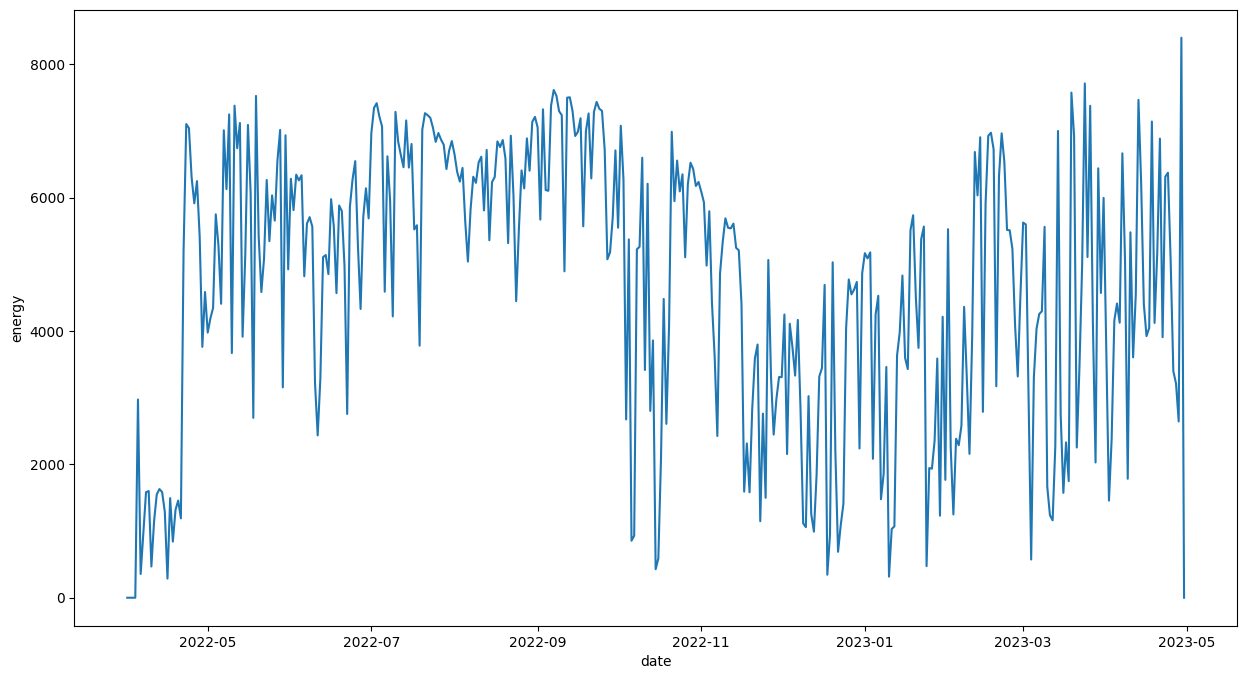

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(y='energy',x='date',data=df)

In [ ]:
df.shape

(395, 14)

<ipython-input-192-9ef26b34ea6a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_cor= df.corr()


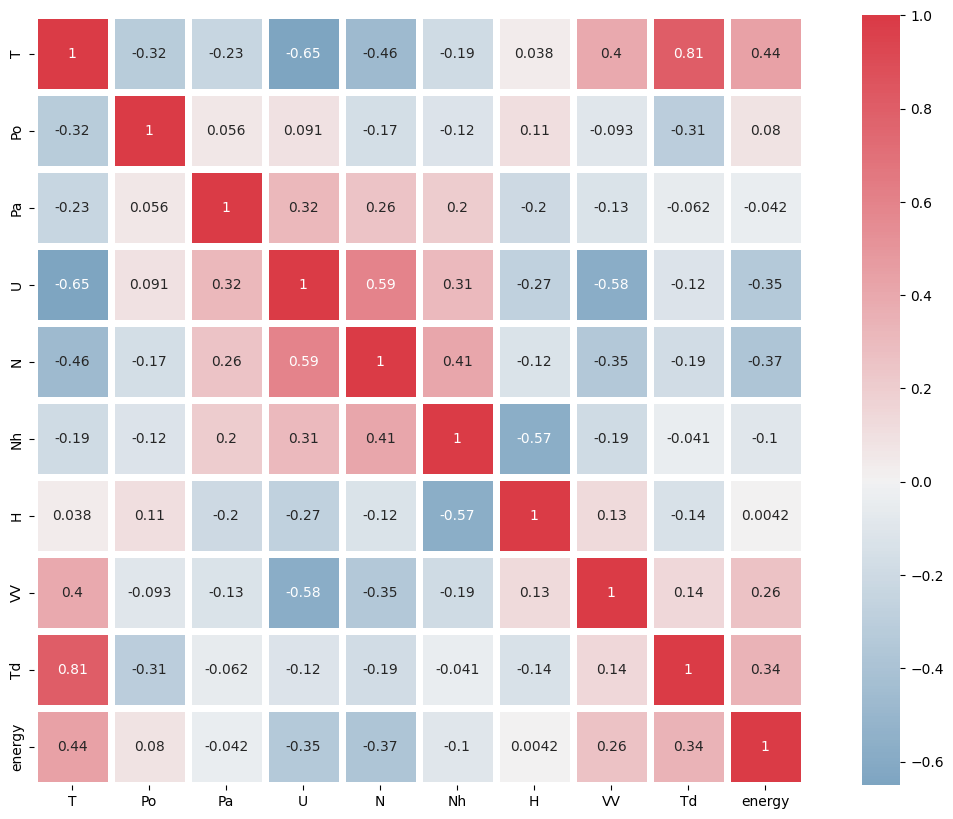

In [ ]:
test_cor= df.corr()
f,ax=plt.subplots(figsize=(15,10))
cmap=sns.diverging_palette(240,10,n=9,as_cmap=True)
sns.heatmap(test_cor,cmap=cmap,annot=True,vmax=1,center=0,square=True,linewidths=5);

In [ ]:
# PARAMETERS
layer_size = 2
units =  30
SEED = 123
learning_rate = 0.01
layer = 'LSTM'
activation_function = 'relu'
dropout_rate = 0.1
epoch = 10
batch_size = 128
loss_function = 'mae'
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
return_sequence = True
target = 'energy'
n_hours = 7
train_size = 0.8

# Aynı sonuçlar üretebilmek için
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
print("SEED Ayarlandı: ", SEED)


cols_to_analyze = [
    "T",
    "Po",
    "U",
    "N",
    "VV",
    "Td",
    "energy"
]


SEED Ayarlandı:  123


In [ ]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = pd.DataFrame(scaler.fit_transform(df[cols_to_analyze]),
                         index=df.index,
                         columns=cols_to_analyze)

Train Codes:

In [ ]:
# reframe data
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
reframed_df = pd.DataFrame(
    series_to_supervised(scaled_df.to_numpy(), n_hours, len([target])))
# Düşürülecek sütunlar sondan özellik sayısından 1 eksik olana kadar gideceğiz.
reframed_df = reframed_df.iloc[:, :-(len(cols_to_analyze) - 1)]
reframed_df.index = df.index[n_hours:]

In [ ]:
scaled_df.head()

,T,Po,U,N,VV,Td,energy
date,,,,,,,
2023-04-30,0.448836,0.387896,0.322002,0.2,1.000000,0.288390,0.000000
2023-04-29,0.306046,0.380585,0.591124,0.9,1.000000,0.374532,1.000000
2023-04-28,0.326041,0.398050,0.638338,1.0,1.000000,0.415730,0.314782
2023-04-27,0.430016,0.170593,0.730878,0.9,0.494949,0.632959,0.382619
2023-04-26,0.589508,0.236799,0.340888,0.7,1.000000,0.460674,0.404512


In [ ]:
# split_data
X = reframed_df.iloc[:, :-1]
y = reframed_df.iloc[:, -1]
print(X.shape, "x", y.shape, "y")

(388, 49) x (388,) y


In [ ]:
reframed_df

,var1(t-7),var2(t-7),var3(t-7),var4(t-7),var5(t-7),var6(t-7),var7(t-7),var1(t-6),var2(t-6),var3(t-6),...,var6(t-2),var7(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t)
date,,,,,,,,,,,,,,,,,,,,,
2023-04-23,0.448836,0.387896,0.322002,0.2,1.000000,0.288390,0.000000,0.306046,0.380585,0.591124,...,0.483146,0.602147,0.498941,0.423233,0.556185,0.4,1.0,0.460674,0.758932,0.471183
2023-04-22,0.306046,0.380585,0.591124,0.9,1.000000,0.374532,1.000000,0.326041,0.398050,0.638338,...,0.460674,0.758932,0.471183,0.378960,0.654391,0.9,1.0,0.580524,0.751799,0.528111
2023-04-21,0.326041,0.398050,0.638338,1.0,1.000000,0.415730,0.314782,0.430016,0.170593,0.730878,...,0.580524,0.751799,0.528111,0.376117,0.492918,0.5,1.0,0.535581,0.465236,0.473771
2023-04-20,0.430016,0.170593,0.730878,0.9,0.494949,0.632959,0.382619,0.589508,0.236799,0.340888,...,0.535581,0.465236,0.473771,0.320877,0.616619,0.6,1.0,0.558052,0.819876,0.426017
2023-04-19,0.589508,0.236799,0.340888,0.7,1.000000,0.460674,0.404512,0.572101,0.352559,0.374882,...,0.558052,0.819876,0.426017,0.281885,0.727101,0.9,1.0,0.565543,0.615240,0.568337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-05,0.293813,0.525183,0.467422,0.9,1.000000,0.258427,0.184286,0.364150,0.133631,0.669500,...,0.468165,0.116545,0.566690,0.321284,0.404155,0.4,1.0,0.449438,0.042381,0.667843
2022-04-04,0.364150,0.133631,0.669500,0.7,1.000000,0.471910,0.136427,0.684545,0.274574,0.207743,...,0.449438,0.042381,0.667843,0.314785,0.143532,0.9,1.0,0.370787,0.353925,0.553987
2022-04-03,0.684545,0.274574,0.207743,0.0,1.000000,0.543071,0.055714,0.629264,0.368400,0.381492,...,0.370787,0.353925,0.553987,0.557677,0.216242,0.2,1.0,0.344569,0.000000,0.572101


In [ ]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(
    X, y, train_size=train_size, shuffle=False)
X_train = X_train_df.to_numpy().reshape(
    (X_train_df.shape[0], n_hours, scaled_df.shape[1]))
X_test = X_test_df.to_numpy().reshape(
    (X_test_df.shape[0], n_hours, scaled_df.shape[1]))

In [ ]:
X_train.shape, y_train_df.shape, X_test.shape, y_test_df.shape

((310, 7, 7), (310,), (78, 7, 7), (78,))

In [ ]:
print(X_train.shape, "X_train.shape")
print(X_test.shape, "X_test.shape")
print(y_train_df.shape, "y_train_df.shape")
print(y_test_df.shape, "X_test.shape")

(310, 7, 7) X_train.shape
(78, 7, 7) X_test.shape
(310,) y_train_df.shape
(78,) X_test.shape


In [ ]:
model = Sequential()
model.add(
    SimpleRNN(units,
              activation=activation_function,
              input_shape=(X_train.shape[1], X_train.shape[2]),
              return_sequences=True))
model.add(Dropout(dropout_rate))
model.add(SimpleRNN(units, activation=activation_function))
model.add(Dropout(dropout_rate))
model.add(Dense(1))
model.compile(loss=loss_function, optimizer=optimizer)
history = model.fit(X_train,
                    y_train_df.to_numpy(),
                    epochs=epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test_df.to_numpy()),
                    verbose=1,
                    shuffle=False)

Epoch 1/10
3/3 [==============================] - 2s 198ms/step - loss: 0.4370 - val_loss: 0.1712
Epoch 2/10
3/3 [==============================] - 0s 23ms/step - loss: 0.1721 - val_loss: 0.0986
Epoch 3/10
3/3 [==============================] - 0s 22ms/step - loss: 0.2120 - val_loss: 0.1059
Epoch 4/10
3/3 [==============================] - 0s 25ms/step - loss: 0.1726 - val_loss: 0.1121
Epoch 5/10
3/3 [==============================] - 0s 27ms/step - loss: 0.1501 - val_loss: 0.1018
Epoch 6/10
3/3 [==============================] - 0s 22ms/step - loss: 0.1446 - val_loss: 0.1225
Epoch 7/10
3/3 [==============================] - 0s 26ms/step - loss: 0.1681 - val_loss: 0.1331
Epoch 8/10
3/3 [==============================] - 0s 26ms/step - loss: 0.1194 - val_loss: 0.0871
Epoch 9/10
3/3 [==============================] - 0s 23ms/step - loss: 0.1436 - val_loss: 0.1367
Epoch 10/10
3/3 [==============================] - 0s 34ms/step - loss: 0.1494 - val_loss: 0.1032


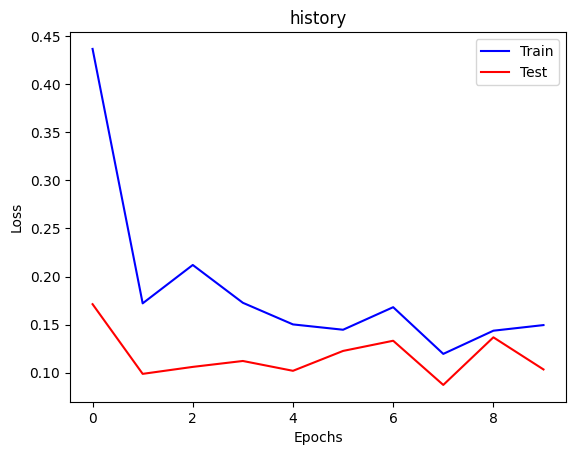

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, "b", label="Train")
plt.plot(epochs, val_loss, "r", label="Test")
plt.title("history")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
scaler_pred = MinMaxScaler()
scaler_pred.fit(df[target].to_numpy().reshape(-1, 1))
y_pred_test = model.predict(
    X_test)  # yhat tahmin değerleri y_test ler ile kıyaslanacak.
# inverse scaling for forecast
inv_y_pred_test = scaler_pred.inverse_transform(y_pred_test)
y_true_test = scaler_pred.inverse_transform(y_test_df.to_numpy().reshape(
    -1, 1))
# make predictions (train)
y_pred_train = model.predict(
    X_train)  # yhat tahmin değerleri y_test ler ile kıyaslanacak.
# inverse scaling for forecast
inv_y_pred_train = scaler_pred.inverse_transform(y_pred_train)
y_true_train = scaler_pred.inverse_transform(y_train_df.to_numpy().reshape(
    -1, 1))

10/10 [==============================] - 0s 3ms/step


In [ ]:
# TEST
test_rmse = mean_squared_error(inv_y_pred_test, y_true_test, squared=False)
test_mae = mean_absolute_error(inv_y_pred_test, y_true_test)

In [ ]:
test_rmse

1082.214628388687

In [ ]:
test_mae

867.2647349281452

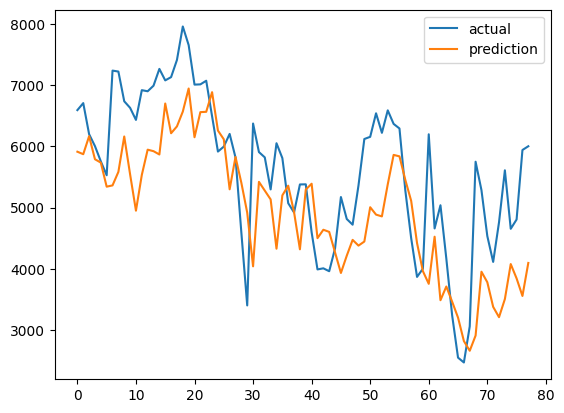

In [ ]:
plt.plot(y_true_test[:200], label="actual")
plt.plot(inv_y_pred_test[:200], label="prediction")
plt.legend()

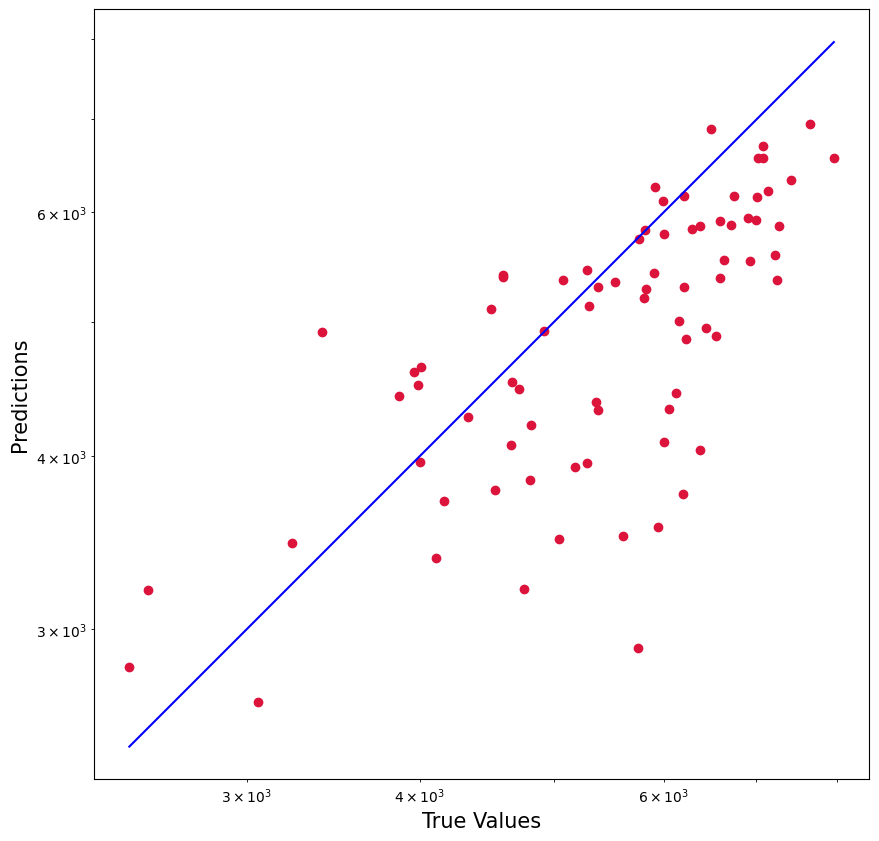

In [ ]:
# train_test train için mi test için mi
plt.figure(figsize=(10, 10))
plt.scatter(y_true_test, inv_y_pred_test, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(inv_y_pred_test), max(y_true_test))
p2 = min(min(inv_y_pred_test), min(y_true_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
#plt.savefig("images/true_preds{}_{}.jpg".format(model_number, train_test))
plt.show()